# This notebook is used to demonstrate the PRM algorithm

In [2]:
import json
from text2traj2text.retail_env.core.layout import Layout
from text2traj2text.retail_env.core.core import Position
from text2traj2text.retail_env.movement_planner.movement_planner import MovementPlanner
from text2traj2text.retail_env.movement_planner.prm import PRM
import csv
import matplotlib.pyplot as plt

In [3]:
with open("../../data/super-market/floor_plan/order_X.json", "r") as f:
    order = json.load(f)
with open("../../data/super-market/floor_plan/X.csv", "r") as f:
    reader = csv.reader(f)
    floor_map = [row for row in reader]

layout = Layout.from_floor_map_and_item_order(floor_map, order)

combined_planner = MovementPlanner(layout=layout, prm_args={"num_samples": 200}, dwa_args={"max_steps": 100})

In [4]:
prm = PRM(layout=layout, num_samples=500)

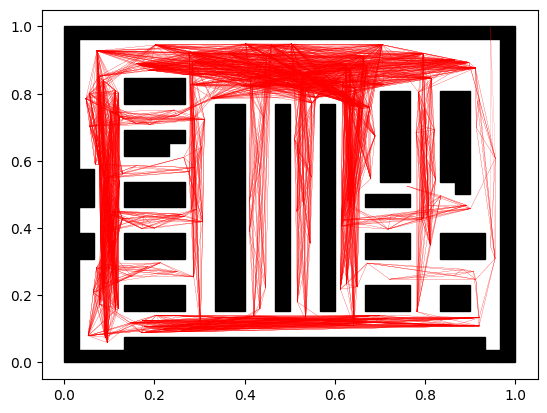

In [5]:
fig, ax = plt.subplots()

for i in range(len(layout.obstacles.x)):
    ax.add_patch(plt.Rectangle((layout.obstacles.x[i], layout.obstacles.y[i]), layout.obstacles.w[i], layout.obstacles.h[i], color='black'))

edges = combined_planner.global_planner.e
samples = combined_planner.global_planner.sample

for e in edges:
    e = e.astype(int)
    ax.plot([samples.x[e[0]], samples.x[e[1]]], [samples.y[e[0]], samples.y[e[1]]], 'r-', lw=0.1)

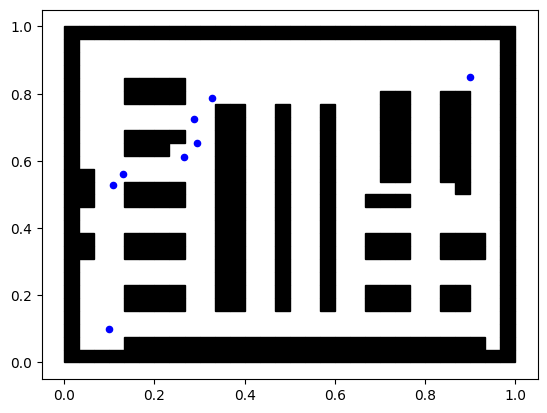

In [6]:
start_1 = Position(0.1,0.1)
goal_1 = Position(0.9,0.85)

path = prm.plan(start_1, goal_1)

fig, ax = plt.subplots()

for i in range(len(layout.obstacles.x)):
    ax.add_patch(plt.Rectangle((layout.obstacles.x[i], layout.obstacles.y[i]), layout.obstacles.w[i], layout.obstacles.h[i], color='black'))

ax.scatter(path.x, path.y, c='b', s=20)